# Predicting Loan Repayment


The dataset for this project is retrieved from kaggle, the home of Data Science.

The major aim of this project is to predict whether the customers will have their loan paid or not. Therefore, this is a supervised classification problem to be trained.

### **1- Importing Libraries**

In [ ]:
# Import the following Libraries
# numpy
# pandas
# matplotlib plotting software
# seaborn 
# Make matplotlib available through all code boxes

# From Sklearn you'll have to look up from where here. 
# Label Encoder, train test split, logisitic regression, confusion_matrix, classification_report,accuracy_score
# DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier,  SVC, GridSearchCV

# Plotly Express
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **2- Getting Data**

In [ ]:
# read the data from the csv into a dataframe
df = pd.read_csv("/content/drive/MyDrive/datasets_137197_325031_test_Y3wMUE5_7gLdaTN.csv")

In [ ]:
# show the top 4 lines of the dataframe
df.head()[:4]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban


In [ ]:
# show the shape of the dataframe
df.shape

(367, 12)

##### 2-1-Renaming columns

In [ ]:
# rename all the columns as lowercase strings
df.columns=df.columns.str.lower()
df

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
# rename all the columns so that they all have _ in between any column head with two or more words

df = df.rename(columns = {"applicantincome": "applicant_income", "coapplicantincome": "coapplicant_income", "loanamount": "loan_amount"})
print(df)

      loan_id gender married dependents     education self_employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     applicant_income  coapplicant_income  loan_amount  loan_amount_term  \
0                5720                   0        110.0             360.

##### 2-2-Checking null values

In [ ]:
# Check all the columns to see if they have null values (NaN) and sum them
print(df.isnull().sum().sum())

84


we take care of missing values in "loan_amount" and "credit_history".
For other null values, we either delete a particular row if it has a null value for a particular feature and a particular column if it has more than 70-75% of missing values. This method is advised only when there are enough samples in the data set. 

In [ ]:
# fill the null values in the loan amount column with the mean of the loan amount  column
df['loan_amount']=df['loan_amount'].fillna(df['loan_amount'].mean())   

In [ ]:
# fill the null values in the  credit history column with the median of the credit history column
df["credit_history"]=df["credit_history"].fillna(df['credit_history'].mean()) 

In [ ]:
df.dropna(axis=0, inplace=True)

# write down what this column does
# this line removes rows with missing values and saves the dataframe as the one without the missing values

(318, 12)

In [ ]:
# prove there are no more null values in the columns using the same command as above
print(f"There are {len(df)} rows before removing missing values again.")
df.dropna(axis=0, inplace=True)
print(f"There are the same number of rows ({len(df)}) rows after removing missing values again.")

There are 318 rows before removing missing values again.
There are the same number of rows (318) rows after removing missing values again.


In [ ]:
# show the top 4 lines of the dataframe
df.head()[:4]

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban


In [ ]:
# show the new shape of the dataframe
df.shape

(318, 12)

In [ ]:
# show the information/ statistics on this dataframe
df.describe()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history
count,318.000000,318.000000,318.000000,318.000000,318.000000
mean,4717.437107,1562.845912,136.580284,343.685535,0.838478
std,4907.418483,2427.506019,62.591535,64.156958,0.352840
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2880.250000,0.000000,102.000000,360.000000,1.000000
50%,3788.500000,955.000000,126.000000,360.000000,1.000000
75%,5000.000000,2398.250000,154.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
# get statiscal information on the data frame like count/mean/standard deviation etc
df.describe()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history
count,318.000000,318.000000,318.000000,318.000000,318.000000
mean,4717.437107,1562.845912,136.580284,343.685535,0.838478
std,4907.418483,2427.506019,62.591535,64.156958,0.352840
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2880.250000,0.000000,102.000000,360.000000,1.000000
50%,3788.500000,955.000000,126.000000,360.000000,1.000000
75%,5000.000000,2398.250000,154.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


##### 2-3-Label Encoder for Dependents

In [ ]:
type(df['dependents'].iloc[0])

str

In [ ]:
df['dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [ ]:
model6=LabelEncoder()

In [ ]:
model6.fit(df['dependents'])

LabelEncoder()

In [ ]:
df['dependents']= model6.transform(df['dependents'])

Explain what they are doing in this section

In [ ]:
# The code in the above sectios changed the data type of the values in the dependents column of the df dataframe from string to numpy integers

In [ ]:
df['dependents'].value_counts()

0    183
2     54
1     46
3     35
Name: dependents, dtype: int64

### 3-Exploratory Data Analysis

##### 3-1- Visualization

In [ ]:
# get the counts of Loan statuses with "Y" in the column

# there is no column called "loan_status", but if there were to be one, then i would do this:
df["loan_status"].value_counts("Y")

In [ ]:
# get the counts of Loan statuses with "N" in the column
df["loan_status"].value_counts("N")

In [ ]:
# make a pie plot that shows the distrubution of Yes loans and Y loans
# this plot should have a title, different colors, the percentages inside the sections 

69% of applicants repay the loan and 39% do not repay the loan.

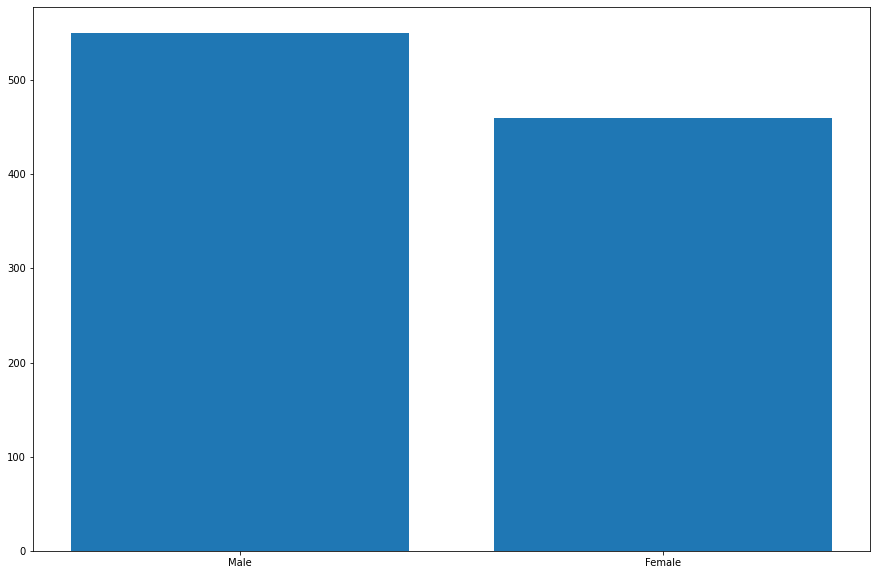

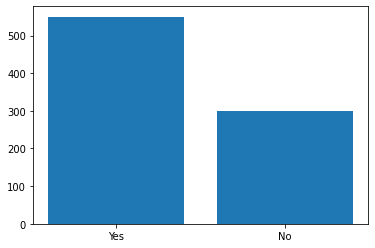

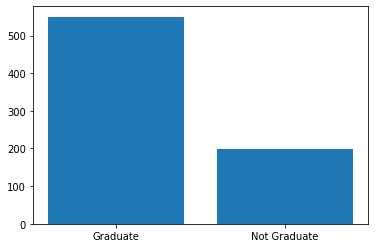

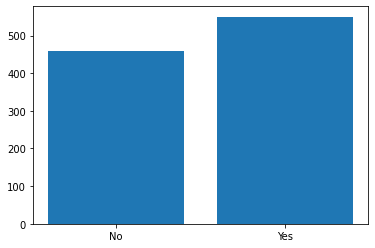

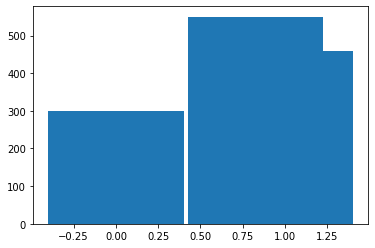

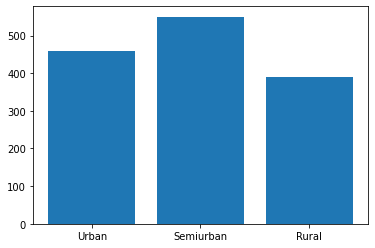

In [ ]:
# make six bar charts that create the basica comparisons listed below
# each should have legends, and as different colors as possible.
# Plots 1 and 4 should have y labels and ticks while the rest of them should not

plt.figure(figsize=(15,10))
plt.bar(x = df["gender"].values, height = df["loan_amount"].values)
plt.show()
plt.bar(x = df["married"].values, height = df["loan_amount"].values)
plt.show()
plt.bar(x = df["education"].values, height = df["loan_amount"].values)
plt.show()
plt.bar(x = df["self_employed"].values, height = df["loan_amount"].values)
plt.show()
plt.bar(x = df["credit_history"].values, height = df["loan_amount"].values)
plt.show()
plt.bar(x = df["property_area"].values, height = df["loan_amount"].values)
plt.show()

Comparison between Genders in getting the Loan shows that a Male Individual has more chance of repaying the Loan.

Comparison between Married Status in getting the Loan shows that a Married Individual has more chance of repaying the Loan.
   
Comparison between Education Status of an Individual in getting the Loan shows that a Graduate Individual has more chance of repaying the Loan.
    
Comparison between Self-Employed or Not in getting the Loan shows that Not Self-Employed has more chance of repaying the Loan.

Comparison between Credit History for getting the Loan shows that an individual with a credit history has more chance of repaying the Loan.
    
Comparison between Property Area for getting the Loan shows that People living in Semi-Urban Area have more chance to repay the Loan.

In [ ]:
px.sunburst(data_frame=df ,path=['gender','loan_status'], color='loan_amount')


# try this code to see if it works. Can you fix it

ValueError: ignored

In [ ]:
plt.figure(figsize=(15,10))

# create violin plots that have the six features shown above in the x value and loan amount in the y value
# Plots 1 and 4 should have y labels and ticks while the rest of them should not



In [ ]:
plt.figure(figsize=(18,5))

# Make three subplots that show frequency distributions of applicant incomes, co-applicant incomes and loan amounts
# these should have lines and bars


In [ ]:
px.scatter_3d(data_frame=df,x='applicant_income',y='co-applicant_income',z='loan_amount',color='loan_status')

# try this command and see if it works

##### 3-2-Encoding

###### 3-2-1-gender

In [ ]:
model1=LabelEncoder()

In [ ]:
model1.fit(df['gender'])

LabelEncoder()

In [ ]:
df['gender']= model1.transform(df['gender'])

###### 3-2-2-married

In [ ]:
model2=LabelEncoder()

In [ ]:
model2.fit(df['married'])

LabelEncoder()

In [ ]:
df['married']= model2.transform(df['married'])

###### 3-2-3-education

In [ ]:
model3=LabelEncoder()

In [ ]:
model3.fit(df['education'])

LabelEncoder()

In [ ]:
df['education']= model3.transform(df['education'])

###### 3-2-4-self_employed

In [ ]:
model4=LabelEncoder()

In [ ]:
model4.fit(df['self_employed'])

LabelEncoder()

In [ ]:
df['self_employed']= model4.transform(df['self_employed'])

###### 3-2-5-property_area

In [ ]:
model5=LabelEncoder()

In [ ]:
model5.fit(df['property_area'])

LabelEncoder()

In [ ]:
df['property_area']= model5.transform(df['property_area'])

TypeError: ignored

In [ ]:
df

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,4009,1777,113.0,360.0,1.000000,2
363,LP002975,1,1,0,0,0,4158,709,115.0,360.0,1.000000,2
364,LP002980,1,0,0,0,0,3250,1993,126.0,360.0,0.825444,1
365,LP002986,1,1,0,0,0,5000,2393,158.0,360.0,1.000000,0


###### 3-2-6-loan status

In [ ]:
model6=LabelEncoder()

In [ ]:
model6.fit(df['loan_status'])

In [ ]:
df['loan_status']= model6.transform(df['loan_status'])

In [ ]:
df.head()

Text(0.5, 1.0, 'Correlation Matrix for Loan Status')

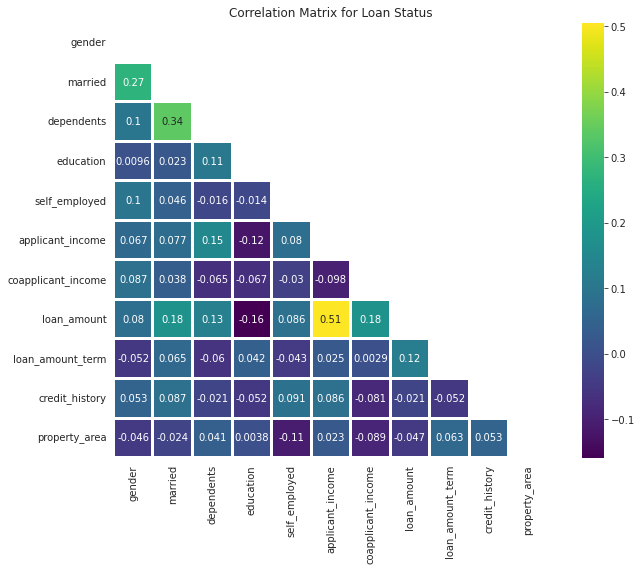

In [ ]:
plt.figure(figsize=(12,8))

corr = df.corr()  #L1
mask = np.zeros_like(corr) #L2
mask[np.triu_indices_from(mask)] = True #L3
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True,annot=True,linewidths=2, cmap='viridis')
plt.title('Correlation Matrix for Loan Status')

Explain what the encoder does here

Explain what this plot would do if it did not include L1, L2, L3

In [ ]:
# The label encoder converts columns that have categorical data from being in data type string to being in data type integer. For example for the married column. a 'Yes' value has being converted into a numeric 1 and vice versa for a 'No' value.

From the above figure, we can see that Credit_History (Independent Variable) has the maximum correlation with Loan_Status (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Credit_History.